### Практическое задание к уроку 1

<b>Оптимизировать x^2*(np.sin(0,5*_x)^2+1)</b>  
Какие параметры шага и количества итераций оптимальны? При каких значениях шага оптимизиция не выходит из локальных минимумов?

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

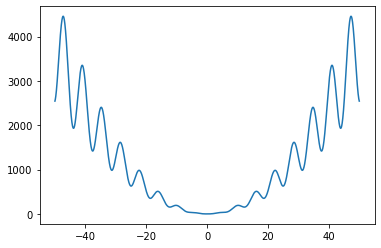

In [2]:
x = np.linspace(-50, 50, 5000)
def func2(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
plt.plot(x, func2(x))
plt.show()

In [3]:
# в grad1 записанна производная от func1
def func1(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
def grad1(_x): return (2*_x * (np.sin(0.5*_x)**2 + 1) + _x**2 * np.sin(0.5*_x) * np.cos(0.5*_x))

In [4]:
def calculate_grad(func, x0, delta=0.01): return (func(x0+delta)-func(x0))/delta
def calculate_grad2(func, x0, delta=0.01): return (func(x0+delta)-func(x0-delta))/(2*delta)

In [5]:
# Проверяю правильность найденного градиента
x0=np.random.uniform(-50, 50)
print('true grad', grad1(x0))
print('method1', calculate_grad(func1, x0))
print('method2', calculate_grad2(func1, x0))

true grad -5.632446093915309
method1 -5.338481306606013
method2 -5.631400087533223


Градиент заданной функции, вычисленный мной аналитически, совпадает с компьютерным градиентом. Сделовательно расчет был произведен верно.

In [6]:
#Добавил вывод резульаттов работы функции fit по флагу show_process
class optimizer:
    def __init__(self, alpha, n_iter):
        self.alpha=alpha
        self.n_iter=n_iter
    def fit(self, func, grad, x0, show_process=False):
        for i in range(self.n_iter):
            if show_process:
                print(f'x: {x0:.4f}, function: {func(x0):.4f}')
            x0-=self.alpha*grad(x0)
        return x0

Подбираю такое количество итераций и значение alpha, при котором оптимизации требуется минимальное количество итераций для нахождения минимума и при этом она не застревает в локальных минимумах.

In [21]:
x0=np.random.uniform(-50, 50)
for num_iter in range(50, 151, 50):
    print(f'\nNumber of iterations: {num_iter}:\n')
    for alpha in np.linspace(0.01, 0.1, 19):
        opt1=optimizer(alpha, num_iter)
        x=opt1.fit(func1, grad1, np.random.uniform(-50, 50))
        print(f'alpha={alpha:.3f} - x: {x:.4f}, function: {func1(x):.4f}')


Number of iterations: 50:

alpha=0.010 - x: -18.6305, function: 351.2428
alpha=0.015 - x: -4.5288, function: 32.6370
alpha=0.020 - x: -12.2228, function: 153.7624
alpha=0.025 - x: 12.2228, function: 153.7624
alpha=0.030 - x: -12.2288, function: 153.7635
alpha=0.035 - x: -0.4007, function: 0.1669
alpha=0.040 - x: -0.1337, function: 0.0180
alpha=0.045 - x: -0.1133, function: 0.0129
alpha=0.050 - x: -0.0351, function: 0.0012
alpha=0.055 - x: -0.0048, function: 0.0000
alpha=0.060 - x: 0.0020, function: 0.0000
alpha=0.065 - x: -0.0041, function: 0.0000
alpha=0.070 - x: -0.0046, function: 0.0000
alpha=0.075 - x: 0.0003, function: 0.0000
alpha=0.080 - x: nan, function: nan
alpha=0.085 - x: -0.0010, function: 0.0000
alpha=0.090 - x: nan, function: nan
alpha=0.095 - x: nan, function: nan
alpha=0.100 - x: 0.0000, function: 0.0000

Number of iterations: 100:

alpha=0.010 - x: 22.8204, function: 957.0300
alpha=0.015 - x: nan, function: nan
alpha=0.020 - x: -12.2228, function: 153.7624
alpha=0.025

Получились следуюште результаты:
* Оптимизатор не застревает на локальных минимуиах при alpha >= 0.045.
* При 50 итерациях цикла оптимизатор находит минимум при шаге не менее 0.9.
* При 100 итерациях цикла оптимизатор находит минимум при шаге не менее 0.6.
* При 150 итерациях данное условие достигается при значении alpha около 0.05.   
__Оптимальным соотношением параметра шага и количестава итераций будет alpha=0.06 и 100 итераций.__

In [22]:
# Проверяю получившийся результат
alpha = 0.06
opt1=optimizer(alpha, 100)
x=opt1.fit(func1, grad1, np.random.uniform(-50, 50), show_process=True)

x: -5.3271, function: 34.3839
x: -5.2481, function: 34.2842
x: -5.1747, function: 34.1946
x: -5.1007, function: 34.1003
x: -5.0208, function: 33.9868
x: -4.9291, function: 33.8320
x: -4.8173, function: 33.5945
x: -4.6728, function: 33.1848
x: -4.4752, function: 32.3939
x: -4.1905, function: 30.7177
x: -3.7676, function: 27.0437
x: -3.1557, function: 19.9169
x: -2.4026, function: 10.7922
x: -1.7469, function: 4.8451
x: -1.3240, function: 2.4153
x: -1.0541, function: 1.3922
x: -0.8666, function: 0.8834
x: -0.7271, function: 0.5955
x: -0.6183, function: 0.4177
x: -0.5306, function: 0.3009
x: -0.4583, function: 0.2208
x: -0.3976, function: 0.1643
x: -0.3462, function: 0.1234
x: -0.3022, function: 0.0934
x: -0.2643, function: 0.0711
x: -0.2315, function: 0.0543
x: -0.2030, function: 0.0416
x: -0.1781, function: 0.0320
x: -0.1564, function: 0.0246
x: -0.1374, function: 0.0190
x: -0.1208, function: 0.0146
x: -0.1062, function: 0.0113
x: -0.0934, function: 0.0087
x: -0.0821, function: 0.0068
x

Минимум функции найден, оптимизатор не застрял в локальном минимуме.

In [32]:
alpha = 0.025
opt1=optimizer(alpha, 100)
x=opt1.fit(func1, grad1, np.random.uniform(-50, 50), True)

x: -34.4106, function: 2361.7970
x: -28.8118, function: 1601.7185
x: -31.3447, function: 983.7350
x: -30.6498, function: 1070.6417
x: -37.0449, function: 1514.0049
x: -45.4405, function: 2981.2591
x: -16.5130, function: 503.5119
x: -17.4456, function: 431.2507
x: -19.9612, function: 509.3714
x: -14.2206, function: 311.7628
x: -10.6054, function: 190.1016
x: -11.0094, function: 180.9722
x: -11.7025, function: 160.9498
x: -12.3165, function: 154.0514
x: -12.1600, function: 153.8864
x: -12.2578, function: 153.8021
x: -12.2008, function: 153.7778
x: -12.2358, function: 153.7678
x: -12.2149, function: 153.7644
x: -12.2276, function: 153.7631
x: -12.2200, function: 153.7626
x: -12.2246, function: 153.7625
x: -12.2218, function: 153.7624
x: -12.2235, function: 153.7624
x: -12.2225, function: 153.7624
x: -12.2231, function: 153.7624
x: -12.2227, function: 153.7624
x: -12.2229, function: 153.7624
x: -12.2228, function: 153.7624
x: -12.2229, function: 153.7624
x: -12.2228, function: 153.7624
x: 

При alpha=0.25 оптимизатор застрязл в локальном минимуме.